<a href="https://colab.research.google.com/github/Robin-Rego/Book_Recommendation_System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Book Recommendation System**

# **Problem Statement**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our
lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences),
recommender systems are today unavoidable in our daily online journeys. In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some
industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to
create a book recommendation system for users

**Content**

The Book-Crossing dataset comprises 3 files.

● Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.

● Books


ooks are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (BookTitle, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.


● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random

In [3]:
# Lets read the file
df_books = pd.read_csv("/content/drive/MyDrive/Almabetter-Project/Unsupervised ML-Book Recomendation Sys/Books.csv")
df_ratings = pd.read_csv("/content/drive/MyDrive/Almabetter-Project/Unsupervised ML-Book Recomendation Sys/Ratings.csv")
df_users = pd.read_csv("/content/drive/MyDrive/Almabetter-Project/Unsupervised ML-Book Recomendation Sys/Users.csv")

In [7]:
# first look of df_books
df_books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [5]:
# Last look of books
df_books.tail(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [6]:
# first look of ratings
df_ratings.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [9]:
# last look of ratings
df_ratings.tail(3)

,User-ID,ISBN,Book-Rating
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


In [10]:
#first look of users
df_users.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [11]:
#last look of users
df_users.tail(3)

,User-ID,Location,Age
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [14]:
# Lets check the shape
print("The shape of Books file is:",df_books.shape)
print("The shape of Ratings file is:", df_ratings.shape)
print("The shape of Users file is:",df_users.shape)

The shape of Books file is: (271360, 8)
The shape of Ratings file is: (1149780, 3)
The shape of Users file is: (278858, 3)


# Lets check for null values
1. Books Dataset

In [15]:
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

**So as we can see columns like "Book-Author", "Publisher", "Image-URL-L" have null values**

In [17]:
#dropping columns containing image URLs which will not be required for analysis
df_books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [20]:
# Lets check for null values in publisher column
df_books.loc[df_books.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


**There are 02 NaN values in "Publisher" Column.
So lets replace that with "other"**

---



In [21]:
#Filling Nan of Publisher with others
df_books.Publisher.fillna('other',inplace=True)

In [25]:
#Simiarly lets check for null values in Book-Author column
df_books.loc[df_books["Book-Author"].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


**There are 01 NaN values in "Book-Author" Column.
So lets replace that with "other"**

---



In [26]:
#Filling Nan of Publisher with others
df_books["Book-Author"].fillna('other',inplace=True)

In [27]:
# Lets check for Null Values
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

**We have cleared all the Null values from df_Books DataFrame**

2. Ratings DataSet

In [28]:
df_ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

**There's no null values present in Ratings Dataset**


3. Users DataSet

In [29]:
df_users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [30]:
#checking percentage of missing values
round(df_users.isnull().mean().mul(100),2)


User-ID      0.00
Location     0.00
Age         39.72
dtype: float64

**Users DataSet consists of 110762 null values which is 39.72 percent of null values**

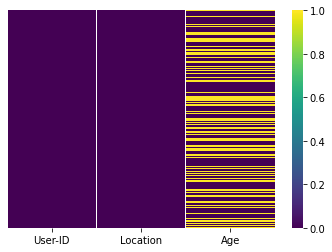

In [31]:
# Let's plot a heatmap to check the Nan values
sns.heatmap(df_users.isnull(), yticklabels = False, cmap = 'viridis')